In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("house_rental_data.csv.txt")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [4]:
data.shape

(645, 8)

In [5]:
data.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [6]:
data.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [18]:
data_df = data.corr()

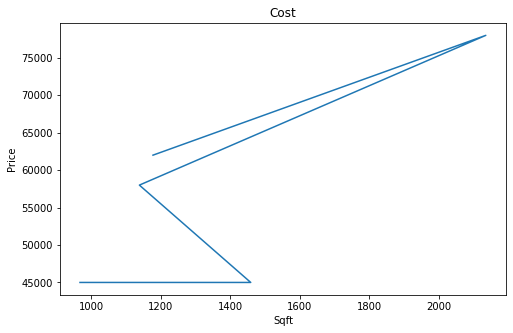

In [16]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(data["Sqft"].head(),data["Price"].head())
ax.set_xlabel("Sqft")
ax.set_ylabel("Price")
ax.set_title("Cost")
plt.show()

<AxesSubplot:xlabel='Price'>

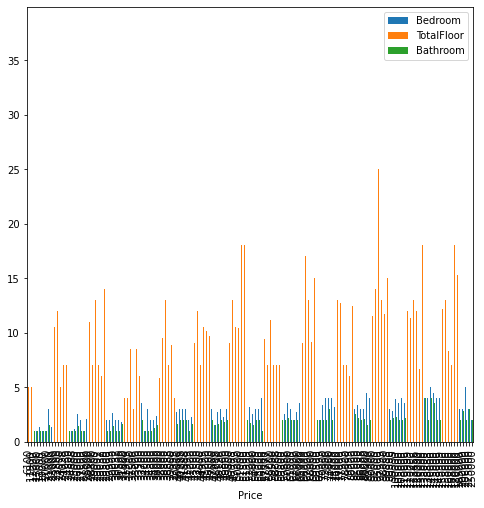

In [22]:
data.groupby(['Price'])[['Bedroom','TotalFloor', 'Bathroom']].mean().plot(kind="bar", figsize=(8,8))

In [26]:
X= data.iloc[:,3:7].values
#y= Data['price'].values
y = data.iloc[:, [7]].values
X.shape
y.shape

(645, 1)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y ,test_size=0.25,random_state=1)

In [30]:
print('X_train.shape:', X_train.shape , '\ny_train.shape: ', y_train.shape, '\nX_test.shape: ', X_test.shape , '\ny_test.shape: ', y_test.shape)

X_train.shape: (483, 4) 
y_train.shape:  (483, 1) 
X_test.shape:  (162, 4) 
y_test.shape:  (162, 1)


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_scaled_train=sc.transform(X_train)
X_scaled_test=sc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [33]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_scaled_train,y_train.ravel())
print(f"Training score ---> {logisticRegr.score(X_scaled_train,y_train.ravel())}")
predict_y =logisticRegr.predict(X_scaled_test)
print(f"Testing score --->  {logisticRegr.score(X_scaled_test,y_test.ravel())}")

Training score ---> 0.13250517598343686
Testing score --->  0.07407407407407407


In [34]:
y_test

array([[ 65000],
       [ 78000],
       [ 57000],
       [100000],
       [120000],
       [ 50000],
       [ 38000],
       [ 26000],
       [149999],
       [ 89000],
       [ 33700],
       [105000],
       [ 45000],
       [ 47000],
       [ 60000],
       [ 33500],
       [ 88000],
       [100000],
       [ 25000],
       [ 78000],
       [ 43000],
       [ 38000],
       [100000],
       [ 55000],
       [ 48000],
       [ 55000],
       [ 39000],
       [ 49800],
       [ 31000],
       [ 17000],
       [150000],
       [ 48000],
       [ 69000],
       [ 36000],
       [ 55000],
       [ 45000],
       [ 60000],
       [ 40000],
       [160000],
       [ 50000],
       [ 30000],
       [ 45000],
       [ 33000],
       [ 61000],
       [ 46000],
       [ 80000],
       [ 20000],
       [ 60000],
       [ 68000],
       [ 50000],
       [ 21000],
       [ 85000],
       [ 45000],
       [ 39000],
       [ 90000],
       [ 89000],
       [120000],
       [ 48800],
       [ 36000

In [35]:
predict_y

array([ 56000,  65000,  45000,  78000,  45000,  65000,  45000,  32000,
        65000,  56000,  65000,  45000,  35000,  45000,  55000,  32000,
        98000, 100000,  35000,  98000,  45000,  45000, 100000,  45000,
        45000,  55000,  65000,  45000,  45000,  35000,  50000,  45000,
       100000,  43000,  55000,  32000,  77999,  45000,  45000,  45000,
        45000,  65000,  45000,  55000,  50000,  55000,  35000,  45000,
       120000,  45000,  32000,  55000,  45000,  45000,  45000,  55000,
        55000,  45000,  45000,  43000,  65000,  98000,  45000,  45000,
        55000,  45000,  45000,  52000,  32000,  45000,  55000,  45000,
        35000, 100000,  45000,  35000,  45000,  65000,  45000,  35000,
        58000, 100000,  45000,  45000,  45000,  35000,  36000,  55000,
        45000,  45000,  98000,  45000,  45000,  65000,  55000, 100000,
       200000,  28000,  43000,  45000, 130000,  55000,  45000,  65000,
        36000,  45000,  35000,  35000,  65000,  45000,  55000,  55000,
      

In [36]:
df = pd.DataFrame(data= {'Actual_price': y_test.ravel(), 'Predict_price': predict_y.ravel()})
df["residual"]=df["Actual_price"]-df["Predict_price"]
df.head()

,Actual_price,Predict_price,residual
0,65000,56000,9000
1,78000,65000,13000
2,57000,45000,12000
3,100000,78000,22000
4,120000,45000,75000


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, predict_y)
confusion_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score 
scores = cross_validate(logisticRegr, X_scaled_train, y_train.ravel(), cv=8)
print(scores.keys())
print('___________________________________________________')
print(scores)

/home/abhishek/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(


dict_keys(['fit_time', 'score_time', 'test_score'])
___________________________________________________
{'fit_time': array([0.13498974, 0.12031007, 0.09321332, 0.09596324, 0.10097933,
       0.11045814, 0.10578132, 0.10821676]), 'score_time': array([0.00091839, 0.00051737, 0.00051022, 0.00053191, 0.00053406,
       0.00052524, 0.00068808, 0.00050354]), 'test_score': array([0.04918033, 0.08196721, 0.06557377, 0.1       , 0.06666667,
       0.06666667, 0.1       , 0.06666667])}


In [42]:
from sklearn.linear_model import Ridge
R_model = Ridge(alpha=1.0).fit(X_scaled_train, y_train.ravel())

print(f"Training score ---> {R_model.score(X_scaled_train,y_train.ravel())}")
predict_y =R_model.predict(X_scaled_test)
print(f"Testing score --->  {R_model.score(X_scaled_test,y_test.ravel())}")

df_1 = pd.DataFrame(data= {'Actual_price': y_test.ravel(), 'Predict_price': predict_y.ravel(), 'residual': df["Actual_price"]-df["Predict_price"]})
df_1.head()

Training score ---> 0.46705079263823146
Testing score --->  0.31695996119050684


,Actual_price,Predict_price,residual
0,65000,72593.280672,9000
1,78000,64654.783335,13000
2,57000,28825.723473,12000
3,100000,65483.341258,22000
4,120000,71702.828687,75000


In [45]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score 
scores = cross_validate(R_model, X_scaled_train, y_train.ravel(), cv=8)
print(scores.keys())
print('___________________________________________________')
print(scores)

dict_keys(['fit_time', 'score_time', 'test_score'])
___________________________________________________
{'fit_time': array([0.00227809, 0.00237155, 0.00200462, 0.00141668, 0.00213671,
       0.0012908 , 0.00120473, 0.00116563]), 'score_time': array([0.00117207, 0.00101018, 0.00096178, 0.00095439, 0.00136423,
       0.00072813, 0.00071526, 0.00073934]), 'test_score': array([0.40649247, 0.35430005, 0.48085943, 0.49442312, 0.31355882,
       0.62916424, 0.42754784, 0.50352225])}


In [47]:
from sklearn.linear_model import Lasso

l_model = Lasso(alpha=1.0).fit(X_scaled_train, y_train.ravel())

print(f"Training score ---> {l_model.score(X_scaled_train,y_train.ravel())}")
predict_y =l_model.predict(X_scaled_test)
print(f"Testing score --->  {l_model.score(X_scaled_test,y_test.ravel())}")

df = pd.DataFrame(data= {'Actual_price': y_test.ravel(), 'Predict_price': predict_y.ravel(), 'residual': df["Actual_price"]-df["Predict_price"]})
df.head()

Training score ---> 0.4670526884710884
Testing score --->  0.31664312073779766


,Actual_price,Predict_price,residual
0,65000,72600.611856,9000
1,78000,64631.311765,13000
2,57000,28749.709370,12000
3,100000,65439.021783,22000
4,120000,71709.308858,75000


In [48]:
from sklearn.model_selection import cross_validate, cross_val_score 
scores = cross_validate(l_model, X_scaled_train, y_train.ravel(), cv=8)
print(scores.keys())
print('___________________________________________________')
print(scores)

dict_keys(['fit_time', 'score_time', 'test_score'])
___________________________________________________
{'fit_time': array([0.00269485, 0.00140047, 0.00126982, 0.00134182, 0.00186253,
       0.00097418, 0.00086355, 0.00086117]), 'score_time': array([0.00124979, 0.00088882, 0.00085545, 0.00114942, 0.00069618,
       0.00059509, 0.00052953, 0.00055361]), 'test_score': array([0.40695326, 0.35387458, 0.4803476 , 0.49423803, 0.31289634,
       0.62930557, 0.42750754, 0.50395479])}


In [49]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1, l1_ratio=0.5, max_iter=100)
elastic.fit(X_scaled_train, y_train.ravel())
print(f"\nTraining score ---> {elastic.score(X_scaled_train,y_train.ravel())}")
predict_y =elastic.predict(X_scaled_test)
print(f"Testing score --->  {elastic.score(X_scaled_test,y_test.ravel())}")

df = pd.DataFrame(data= {'Actual_price': y_test.ravel(), 'Predict_price': predict_y.ravel(), 'residual': df["Actual_price"]-df["Predict_price"]})
df.head()


Training score ---> 0.4323724189228715
Testing score --->  0.32709801358492774


,Actual_price,Predict_price,residual
0,65000,68602.581265,-7600.611856
1,78000,66754.866525,13368.688235
2,57000,39917.318244,28250.290630
3,100000,69155.932871,34560.978217
4,120000,70224.944326,48290.691142


In [50]:
from sklearn.model_selection import cross_validate, cross_val_score 
scores = cross_validate(elastic, X_scaled_train, y_train.ravel(), cv=8)
print(scores.keys())
print('___________________________________________________')
print(scores)

dict_keys(['fit_time', 'score_time', 'test_score'])
___________________________________________________
{'fit_time': array([0.00156188, 0.00342679, 0.00120449, 0.00133562, 0.00132322,
       0.00193191, 0.00094461, 0.00106502]), 'score_time': array([0.00115347, 0.00201106, 0.0011971 , 0.00084829, 0.0009191 ,
       0.00068974, 0.00054121, 0.00086236]), 'test_score': array([0.32787783, 0.35515535, 0.49304929, 0.47304629, 0.35530551,
       0.56696569, 0.41289544, 0.42254617])}
